In [67]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("Tensorflow version: {}".format(tf.__version__))
print("Keras version: {}".format(keras.__version__))

Tensorflow version: 2.2.0
Keras version: 2.3.0-tf


In [68]:
input_data = keras.datasets.fashion_mnist
(x_train_full, y_train_full), (x_test, y_test) = input_data.load_data()
x_valid, x_train = x_train_full[:5000]/255.0, x_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
class_names=['tshirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'boot']

print("Input Data Shape: {}".format(x_train_full.shape))
print("Input Data Type: {}".format(type(x_train_full)))
print("Input Data DType: {}".format(x_train_full.dtype))
print("Input Data DType after Scaling: {}".format(x_train.dtype))
print("Unique Lables: {}".format(np.unique(y_train_full)))

Input Data Shape: (60000, 28, 28)
Input Data Type: <class 'numpy.ndarray'>
Input Data DType: uint8
Input Data DType after Scaling: float64
Unique Lables: [0 1 2 3 4 5 6 7 8 9]


In [69]:
model = keras.models.Sequential()
# make input layer to flatten square images
# could also doL model.add(keras.layers.InputLayer(input_shape=(28,28)))
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(300, activation='relu')) #input dims inferred from previous layer
# explicitly add activation instead of using keyword
# equiv to: model.add(keras.layers.Dense(100, activation='relu')) or
# model.add(keras.layers.Dense(300, activation=keras.activations.relu)) 
model.add(keras.layers.Dense(100))
model.add(keras.layers.Activation(keras.activations.relu))  
model.add(keras.layers.Dense(10, activation='softmax'))


In [70]:
# can also instantiate w a list
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28,28), name="Input"),
    keras.layers.Dense(128, 
                       activation='relu', 
                       name="Layer1", 
                       kernel_initializer=keras.initializers.GlorotUniform(seed=None)), 
    tf.keras.layers.Dropout(0.2,
                           name="Dropout"),
    keras.layers.Dense(10, 
                       activation='softmax', 
                       name="Output",
                       kernel_initializer=keras.initializers.RandomNormal(stddev=0.1))
])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (Flatten)              (None, 784)               0         
_________________________________________________________________
Layer1 (Dense)               (None, 128)               100480    
_________________________________________________________________
Dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
Output (Dense)               (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [71]:
layer1=model.get_layer(name='Layer1')
weights,biases = layer1.get_weights()
print("Variance of Layer1 weights: {}".format(np.var(weights)))
output = model.get_layer(name='Output')
weights, biases = output.get_weights()
print("Variance of OutputLayer weights: {}".format(np.var(weights)))

Variance of Layer1 weights: 0.0021910634823143482
Variance of OutputLayer weights: 0.010182313621044159


In [72]:
model.compile(
    optimizer=keras.optimizers.SGD(
        learning_rate=0.01, 
        momentum=0.0, 
        nesterov=False, 
        name='SGD', 
        #**kwargs
    ),
    loss=keras.losses.SparseCategoricalCrossentropy(
        from_logits=False, 
        #reduction=losses_utils.ReductionV2.AUTO,
        name='sparse_categorical_crossentropy'
    ),
    # sparse_categorical: because target is class index, not class array like [0,0,1,...,0]
    metrics=[keras.metrics.sparse_categorical_accuracy],  
    loss_weights=None,
    sample_weight_mode=None,
    weighted_metrics=None,
    #**kwargs,
)

In [73]:
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=None,
    epochs=3,
    verbose=1,
    callbacks=None,
    validation_split=0.0,
    validation_data=(x_valid, y_valid),
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_batch_size=None,
    validation_freq=1,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
)

Epoch 1/3
1719/1719 [==============================] - 2s 1ms/step - loss: 0.8622 - sparse_categorical_accuracy: 0.7075 - val_loss: 0.5810 - val_sparse_categorical_accuracy: 0.8058
Epoch 2/3
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5899 - sparse_categorical_accuracy: 0.7998 - val_loss: 0.5040 - val_sparse_categorical_accuracy: 0.8314
Epoch 3/3
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5255 - sparse_categorical_accuracy: 0.8196 - val_loss: 0.4624 - val_sparse_categorical_accuracy: 0.8410


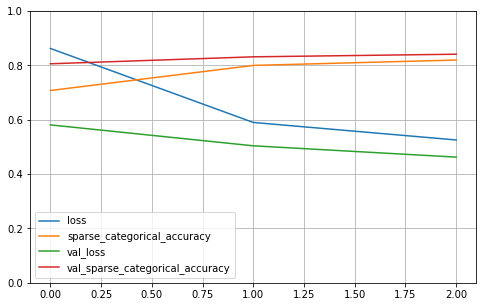

In [74]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [75]:
print("history Object is of Type: {}".format(type(history)))
print("history.history is of Type: {}".format(type(history.history)))
print("keys: {}".format(history.history.keys()))

history Object is of Type: <class 'tensorflow.python.keras.callbacks.History'>
history.history is of Type: <class 'dict'>
keys: dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])


In [76]:
print("Some member variables of history object:")
print("history.params: {}".format(history.params))
history.model.summary()
print("history.epoch: {}".format(history.epoch))

Some member variables of history object:
history.params: {'verbose': 1, 'epochs': 3, 'steps': 1719}
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (Flatten)              (None, 784)               0         
_________________________________________________________________
Layer1 (Dense)               (None, 128)               100480    
_________________________________________________________________
Dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
Output (Dense)               (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
history.epoch: [0, 1, 2]


In [77]:
evaluations = model.evaluate(
    x=x_test,
    y=y_test,
    batch_size=None,
    verbose=1,
    sample_weight=None,
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
    return_dict=False,
)

print("evaluations type: {}".format(type(evaluations)))
print("evaluations: {}".format(evaluations))


313/313 [==============================] - 0s 999us/step - loss: 73.4764 - sparse_categorical_accuracy: 0.7872
evaluations type: <class 'list'>
evaluations: [73.4764404296875, 0.7871999740600586]


In [78]:
predictions = model.predict(
    x_test[:3],
    batch_size=None,
    verbose=0,
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
)
print(predictions)
print(predictions.shape)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
(3, 10)


In [79]:
print(np.argmax(predictions, axis=0))
print(np.argmax(predictions, axis=1))
print(np.argmax(predictions, axis=-1))
print(np.array(class_names)[np.argmax(predictions, axis=-1)])

[0 2 1 0 0 0 0 0 0 0]
[9 2 1]
[9 2 1]
['boot' 'pullover' 'trouser']


In [84]:
# Another way to call the predict function is to use model.__call__ function
predictions = model(x_test[:3])
print(predictions)            # a tensor
print("Predictions as an array:\n{}".format(predictions.numpy()))    # a numpy array

tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(3, 10), dtype=float32)
Predictions as an array: 
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


<b>MODEL 2</b><br>
Using the Softmax activation in the last layer is discouraged as it's impossible to provide an exact and numerically stable loss calculation for all models when using a softmax output

Here, we'll create a second model with no activation in the final layer, train it for stable loss calcs, then wrap the final model in another model w a softmax output layer

For each example the model returns a vector of "[logits](https://developers.google.com/machine-learning/glossary#logits)" or "[log-odds](https://developers.google.com/machine-learning/glossary#log-odds)" scores, one for each class.

In [98]:
model2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28,28), name="Input"),
    keras.layers.Dense(128,  activation='relu', name="Layer1", kernel_initializer=keras.initializers.GlorotUniform(seed=None)), 
    tf.keras.layers.Dropout(0.2,name="Dropout"),
    keras.layers.Dense(10, name="Output", kernel_initializer=keras.initializers.RandomNormal(stddev=0.1))
])
model.summary()

# This loss is equal to the negative log probability of the true class:
# zero if the model is sure of the correct class.
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model2.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.01),
    loss=loss_fn,
    metrics=['accuracy']
)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (Flatten)              (None, 784)               0         
_________________________________________________________________
Layer1 (Dense)               (None, 128)               100480    
_________________________________________________________________
Dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
Output (Dense)               (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [97]:
# we can now use UNTRAINED model to get a prediction on 
predictions = model2(x_train[:1]).numpy()
probabilities = tf.nn.softmax(predictions).numpy()
loss = loss_fn(y_train[:1], predictions).numpy()
print("Prediction: {}".format(predictions))
print("Softmax Probs: {}".format(probabilities))
print("Loss: {}:".format(loss))

# This untrained model should give probs close to random (1/10 for each class), 
# so the initial loss should be close to -tf.log(1/10)
-tf.math.log(1/10).numpy()

Prediction: [[-0.23700957  0.91025496  1.2372909  -0.27956843 -0.9510958  -0.59267235
   0.09381628 -0.19576754  0.7593332  -0.6820349 ]]
Softmax Probs: [[0.0607917  0.19146746 0.26553687 0.05825876 0.02976601 0.04259728
  0.08462919 0.0633513  0.16464573 0.03895581]]
Loss: 17.134559631347656:


2.3025851

In [99]:
model2.fit(x_train, y_train, epochs=5)
model2.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5
1719/1719 [==============================] - 2s 1ms/step - loss: 0.8498 - accuracy: 0.7168
Epoch 2/5
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5818 - accuracy: 0.8016
Epoch 3/5
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5224 - accuracy: 0.8208
Epoch 4/5
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4864 - accuracy: 0.8308
Epoch 5/5
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4638 - accuracy: 0.8371
313/313 - 0s - loss: 67.1781 - accuracy: 0.8122


[67.1781234741211, 0.8122000098228455]

In [105]:
probability_model = tf.keras.Sequential([
  model2,
  tf.keras.layers.Softmax()
])

probs = probability_model(x_test[:5])
print("Class Probs: {}".format(probs))

Class Probs: [[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 1.2979244e-35 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]


In [104]:
idx = np.argmax(probs, axis=-1)
np.array(class_names)[idx]

array(['boot', 'pullover', 'trouser', 'trouser', 'shirt'], dtype='<U8')

In [106]:
model3 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

model3.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.01),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model3.fit(x_train, y_train, epochs=5, validation_data=(x_valid, y_valid))

probability_model = tf.keras.Sequential([
  model3,
  tf.keras.layers.Softmax()
])

probs = probability_model(x_test[:5])
print("Class Probs: {}".format(probs))

Epoch 1/5
1719/1719 [==============================] - 2s 1ms/step - loss: 0.8321 - accuracy: 0.7230 - val_loss: 0.5837 - val_accuracy: 0.7994
Epoch 2/5
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5710 - accuracy: 0.8061 - val_loss: 0.4898 - val_accuracy: 0.8334
Epoch 3/5
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5112 - accuracy: 0.8242 - val_loss: 0.4574 - val_accuracy: 0.8474
Epoch 4/5
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4785 - accuracy: 0.8348 - val_loss: 0.4310 - val_accuracy: 0.8530
Epoch 5/5
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4546 - accuracy: 0.8417 - val_loss: 0.4155 - val_accuracy: 0.8572
Class Probs: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
